In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

In [3]:
with open("../results/results.json", "r") as f:
    results = json.load(f)

In [4]:
def plot_confusion_matrix(cm_array, title, agent_name, first):
    if first:
        num = 'first'
    else:
        num = 'last'
    plt.figure(figsize=(6, 5))
    plt.imshow(cm_array, cmap="Blues")
    
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.xticks([0, 1], ["Positive", "Negative"])
    plt.yticks([0, 1], ["Positive", "Negative"])

    # Print numbers inside cells
    for i in range(2):
        for j in range(2):
            plt.text(
                j, i, format(cm_array[i, j], ','),
                ha="center", va="center",
                fontsize=14, color="black"
            )

    plt.colorbar()
    plt.tight_layout()
    plt.savefig(f'../results/{agent_name}/{agent_name}_cm_{num}.png')
    plt.show()

**Random Agent**
---

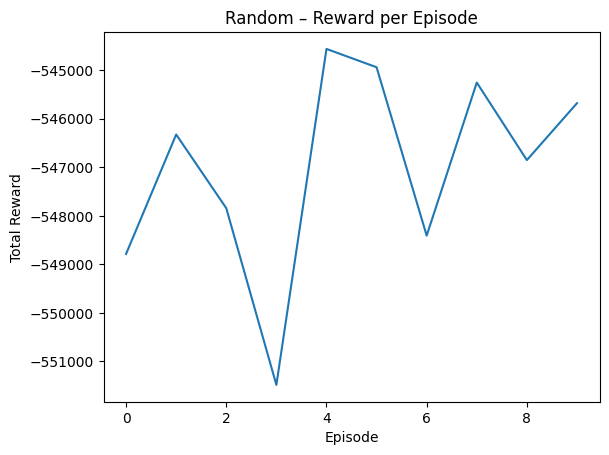

<Figure size 640x480 with 0 Axes>

In [5]:
agent_name = "Random"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.show()
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')

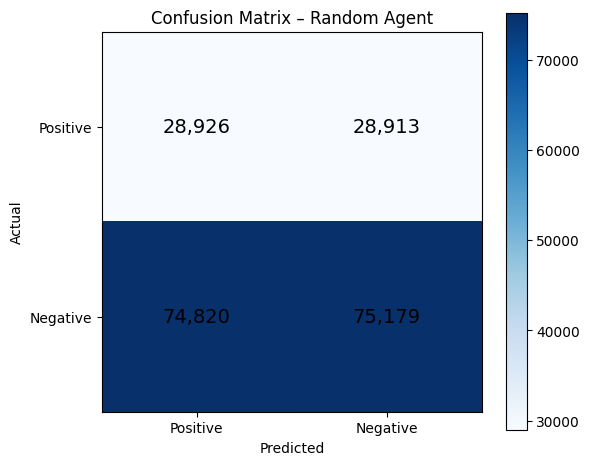

In [6]:
agent_name = "Random"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="Random Agent", agent_name=agent_name, first=False)

**Rule Based Agent**
---

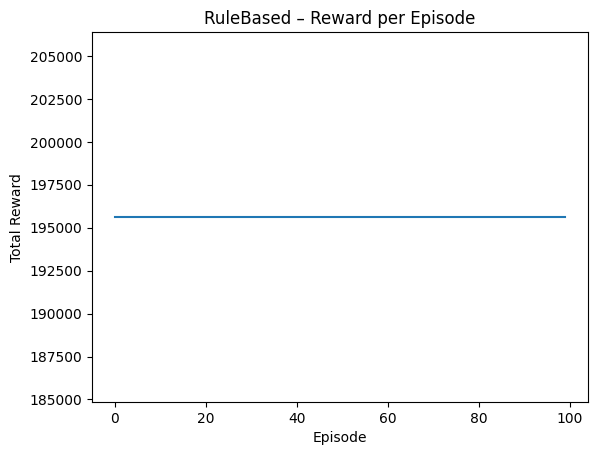

In [7]:
agent_name = "RuleBased"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"] * 10

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()


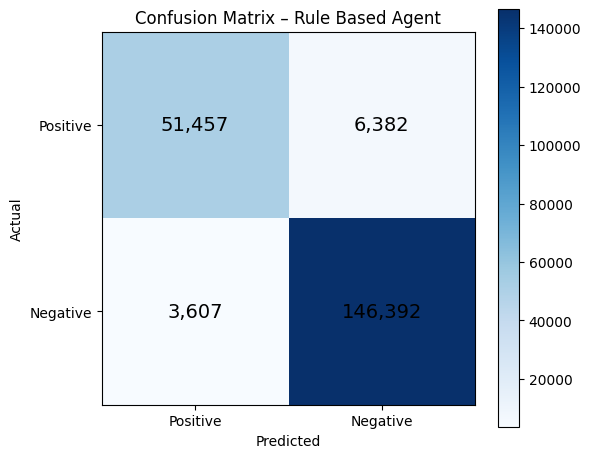

In [8]:
agent_name = "RuleBased"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="Rule Based Agent", agent_name=agent_name, first=False)

**Q-Learning Agent**
---

Reward Curve

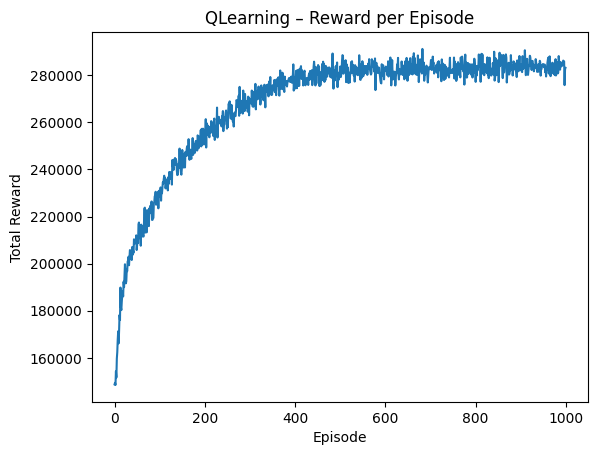

In [9]:
agent_name = "QLearning"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()

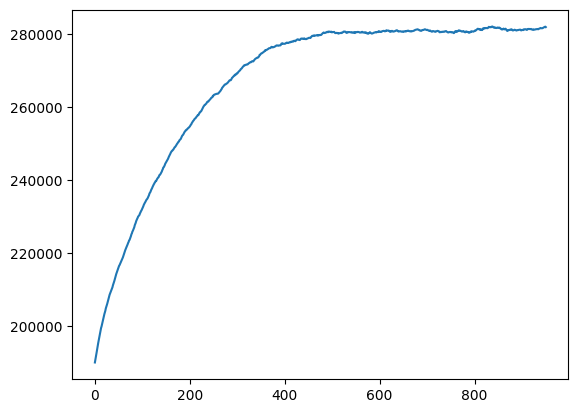

In [36]:
window = 50
smooth = np.convolve(reward_curve, np.ones(window)/window, mode='valid')
plt.plot(smooth)

Confusion Matrix - First Episode

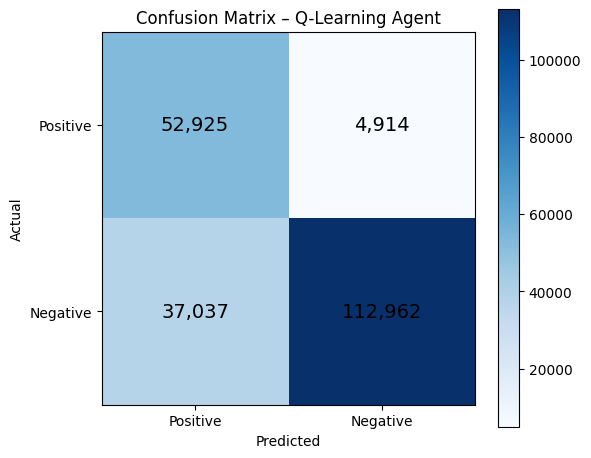

In [11]:
agent_name = "QLearning"
cm = results[agent_name]["summary"]["first"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="Q-Learning Agent", agent_name=agent_name, first=True)

Confusion Matrix - Last Episode

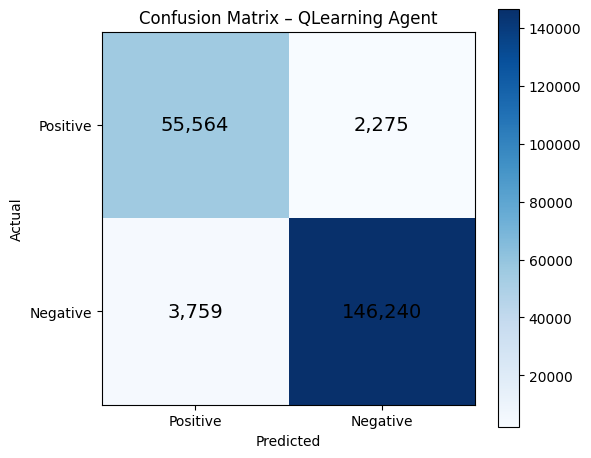

In [12]:
agent_name = "QLearning"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="QLearning Agent", agent_name=agent_name, first=False)

Metrics Comparison

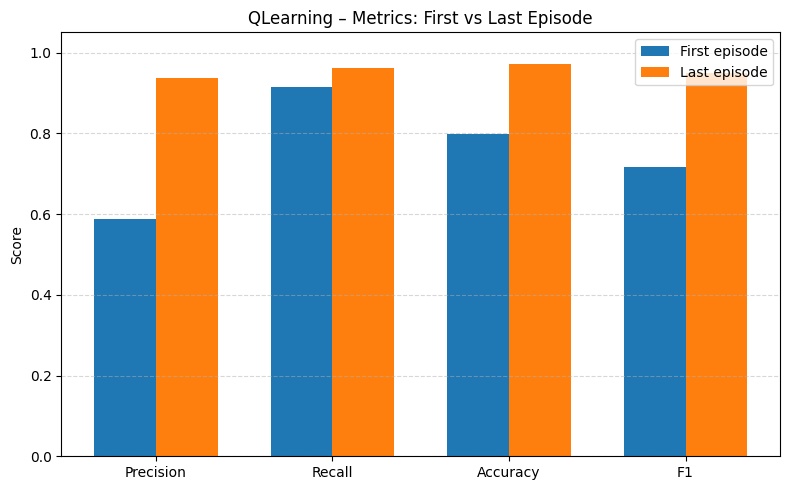

In [13]:
agent_name = "QLearning"

first_metrics = results[agent_name]["summary"]["first"]
last_metrics  = results[agent_name]["summary"]["last"]

metric_names = ["precision", "recall", "accuracy", "f1"]

first_values = [first_metrics[m] for m in metric_names]
last_values  = [last_metrics[m]  for m in metric_names]

x = np.arange(len(metric_names))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, first_values, width, label="First episode")
plt.bar(x + width/2, last_values,  width, label="Last episode")

plt.xticks(x, [m.capitalize() for m in metric_names])
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title(f"{agent_name} – Metrics: First vs Last Episode")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'../results/{agent_name}/metrics_comparison.png')
plt.show()

**SARSA**
---

Reward Curve

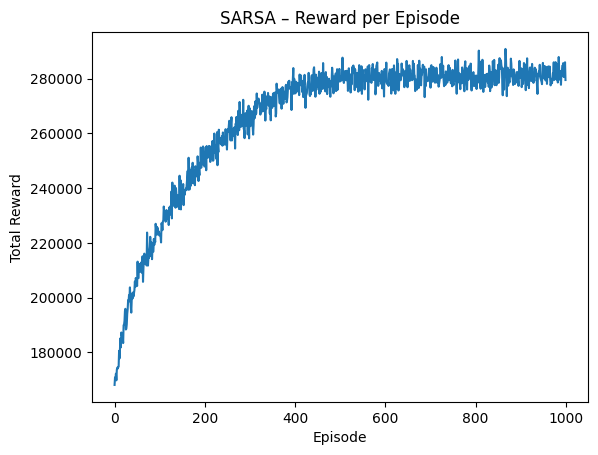

In [14]:
agent_name = "SARSA"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()

Confusion Matrix - First Episode

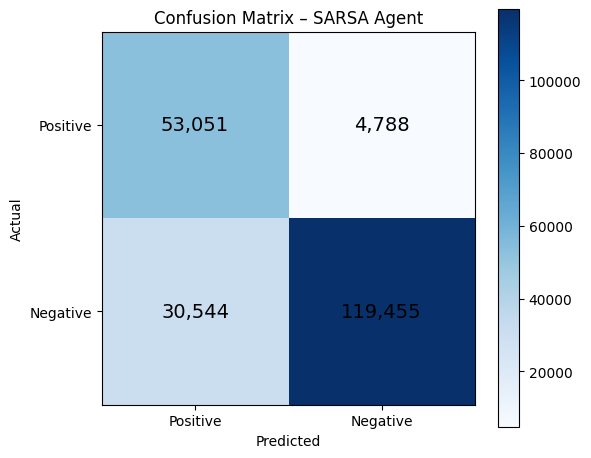

In [15]:
agent_name = "SARSA"
cm = results[agent_name]["summary"]["first"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="SARSA Agent", agent_name=agent_name, first=True)

Confusion Matrix - Last Episode

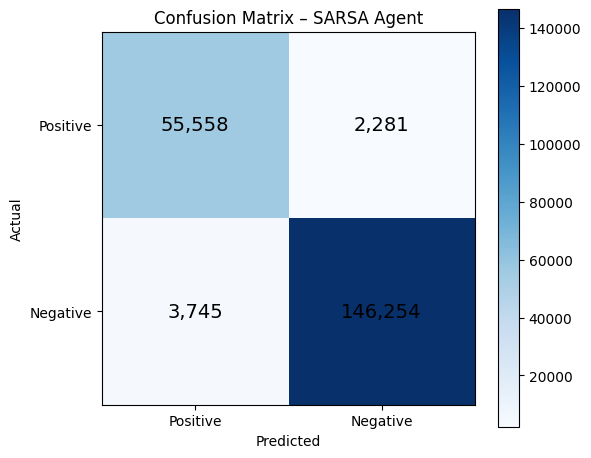

In [16]:
agent_name = "SARSA"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="SARSA Agent", agent_name=agent_name, first=False)

Metrics Comparison

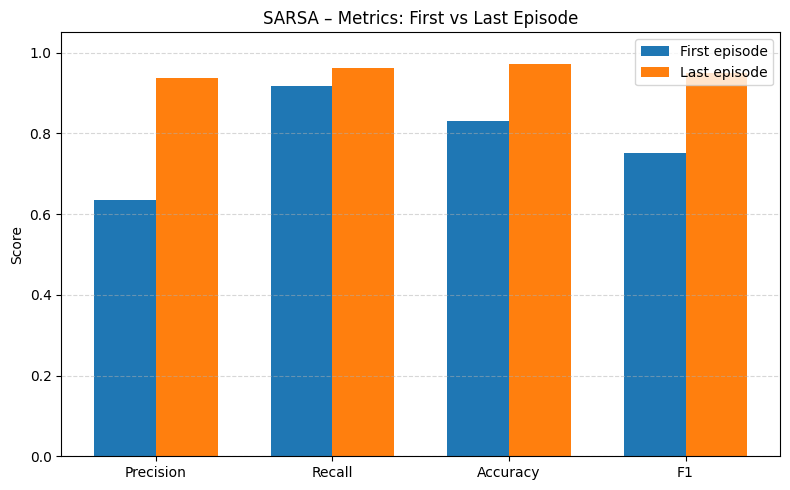

In [17]:
agent_name = "SARSA"

first_metrics = results[agent_name]["summary"]["first"]
last_metrics  = results[agent_name]["summary"]["last"]

metric_names = ["precision", "recall", "accuracy", "f1"]

first_values = [first_metrics[m] for m in metric_names]
last_values  = [last_metrics[m]  for m in metric_names]

x = np.arange(len(metric_names))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, first_values, width, label="First episode")
plt.bar(x + width/2, last_values,  width, label="Last episode")

plt.xticks(x, [m.capitalize() for m in metric_names])
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title(f"{agent_name} – Metrics: First vs Last Episode")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'../results/{agent_name}/metrics_comparison.png')
plt.show()

**DQN**
---

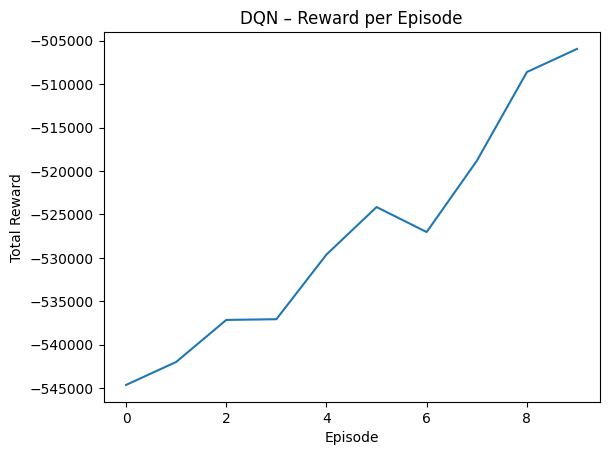

In [44]:
agent_name = "DQN"

agent_res = results[agent_name]
reward_curve = agent_res["reward_curve"]

plt.figure()
plt.plot(reward_curve)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{agent_name} – Reward per Episode")
plt.savefig(f'../results/{agent_name}/{agent_name}_reward_curve.png')
plt.show()

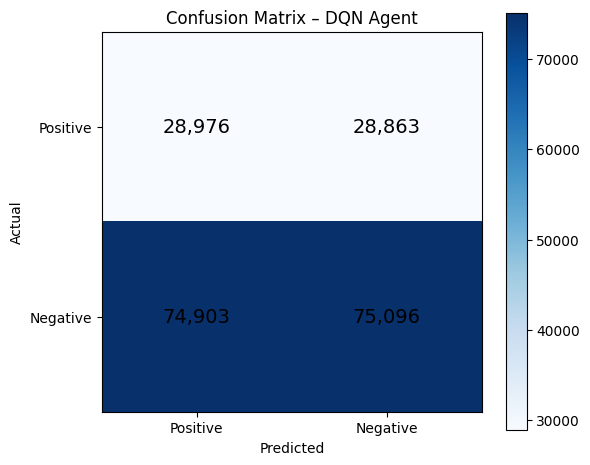

In [45]:
agent_name = "DQN"
cm = results[agent_name]["summary"]["first"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="DQN Agent", agent_name=agent_name, first=True)

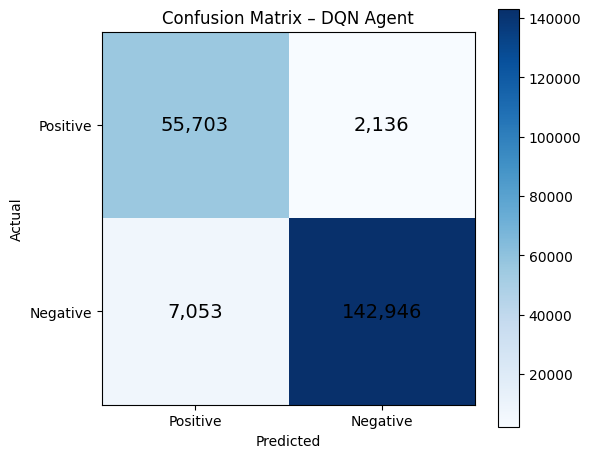

In [46]:
agent_name = "DQN"
cm = results[agent_name]["summary"]["last"]["confusion_matrix"]
cm_array = np.array([
    [cm["TP"], cm["FN"]],
    [cm["FP"], cm["TN"]]
])
plot_confusion_matrix(cm_array, title="DQN Agent", agent_name=agent_name, first=False)

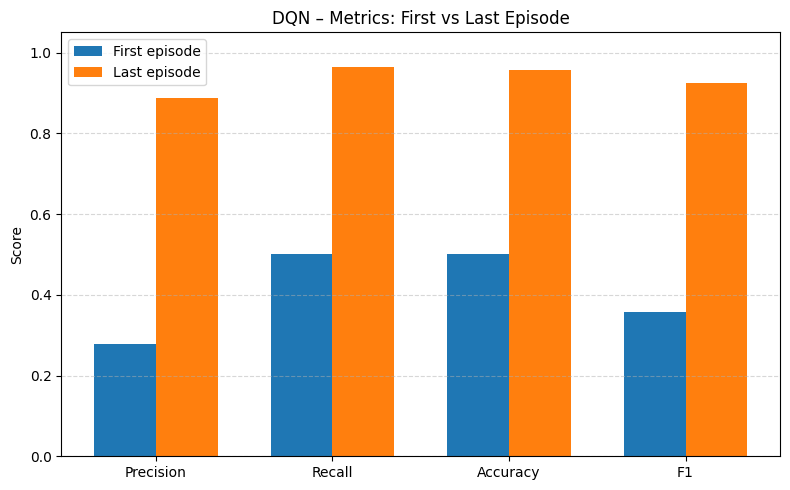

In [47]:
agent_name = "DQN"

first_metrics = results[agent_name]["summary"]["first"]
last_metrics  = results[agent_name]["summary"]["last"]

metric_names = ["precision", "recall", "accuracy", "f1"]

first_values = [first_metrics[m] for m in metric_names]
last_values  = [last_metrics[m]  for m in metric_names]

x = np.arange(len(metric_names))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, first_values, width, label="First episode")
plt.bar(x + width/2, last_values,  width, label="Last episode")

plt.xticks(x, [m.capitalize() for m in metric_names])
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title(f"{agent_name} – Metrics: First vs Last Episode")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig(f'../results/{agent_name}/metrics_comparison.png')
plt.show()

**Combined**
---

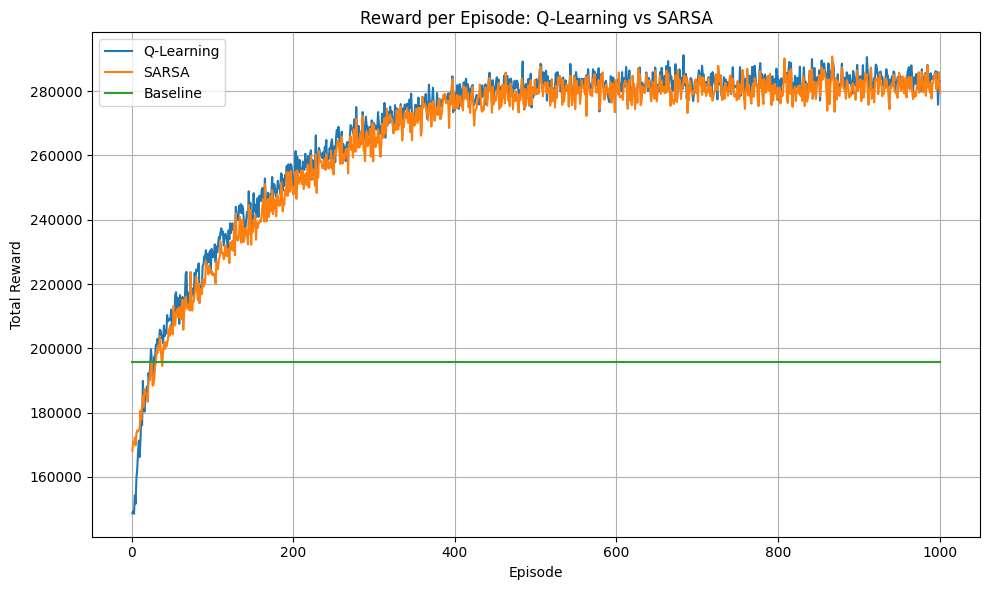

In [43]:
ql_rewards = results["QLearning"]["reward_curve"]
sarsa_rewards = results["SARSA"]["reward_curve"]
baseline = results["RuleBased"]["reward_curve"] * 100


ql_episodes = range(1, len(ql_rewards) + 1)
sarsa_episodes = range(1, len(sarsa_rewards) + 1)


plt.figure(figsize=(10, 6))

# 3. Plot both curves
plt.plot(ql_episodes, ql_rewards, label="Q-Learning")
plt.plot(sarsa_episodes, sarsa_rewards, label="SARSA")
plt.plot(ql_episodes, baseline, label="Baseline")

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward per Episode: Q-Learning vs SARSA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../results/combined/agent_rewards_plot.png')
plt.show()

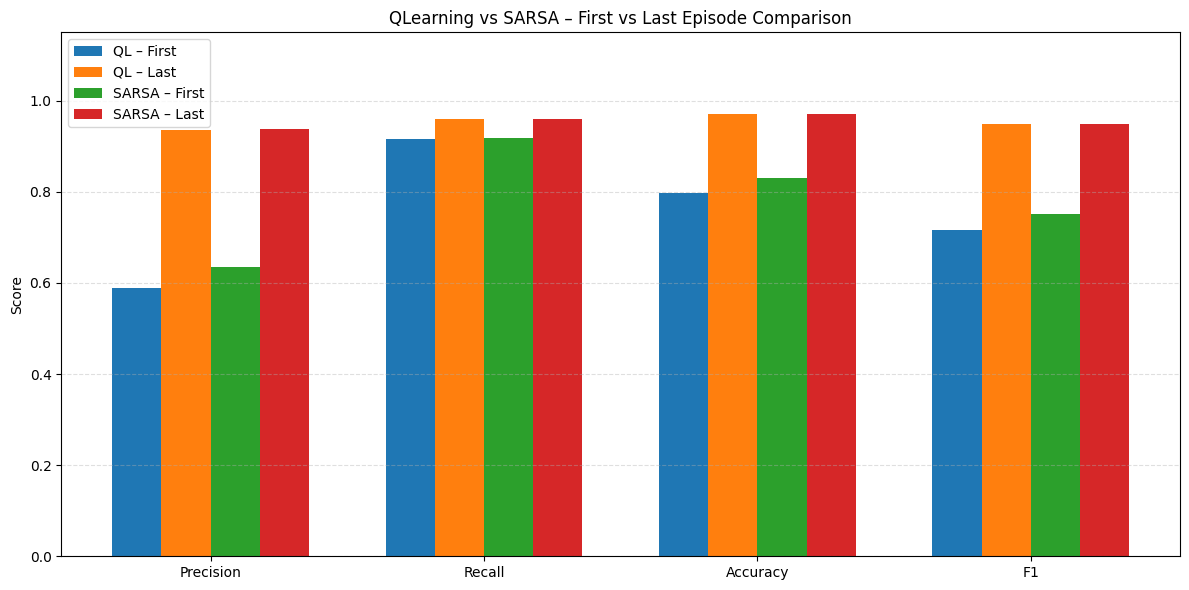

In [23]:
ql_first = results["QLearning"]["summary"]["first"]
ql_last  = results["QLearning"]["summary"]["last"]
sa_first = results["SARSA"]["summary"]["first"]
sa_last  = results["SARSA"]["summary"]["last"]

metrics = ["precision", "recall", "accuracy", "f1"]

ql_first_vals = [ql_first[m] for m in metrics]
ql_last_vals  = [ql_last[m]  for m in metrics]
sa_first_vals = [sa_first[m] for m in metrics]
sa_last_vals  = [sa_last[m]  for m in metrics]

x = np.arange(len(metrics))
width = 0.18  # spacing for 4 bars per metric

plt.figure(figsize=(12, 6))

plt.bar(x - 1.5*width, ql_first_vals, width, label="QL – First")
plt.bar(x - 0.5*width, ql_last_vals,  width, label="QL – Last")
plt.bar(x + 0.5*width, sa_first_vals, width, label="SARSA – First")
plt.bar(x + 1.5*width, sa_last_vals,  width, label="SARSA – Last")

plt.xticks(x, [m.capitalize() for m in metrics])
plt.ylabel("Score")
plt.ylim(0, 1.15)
plt.title("QLearning vs SARSA – First vs Last Episode Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('../results/combined/metrics_comparison_first_last.png')


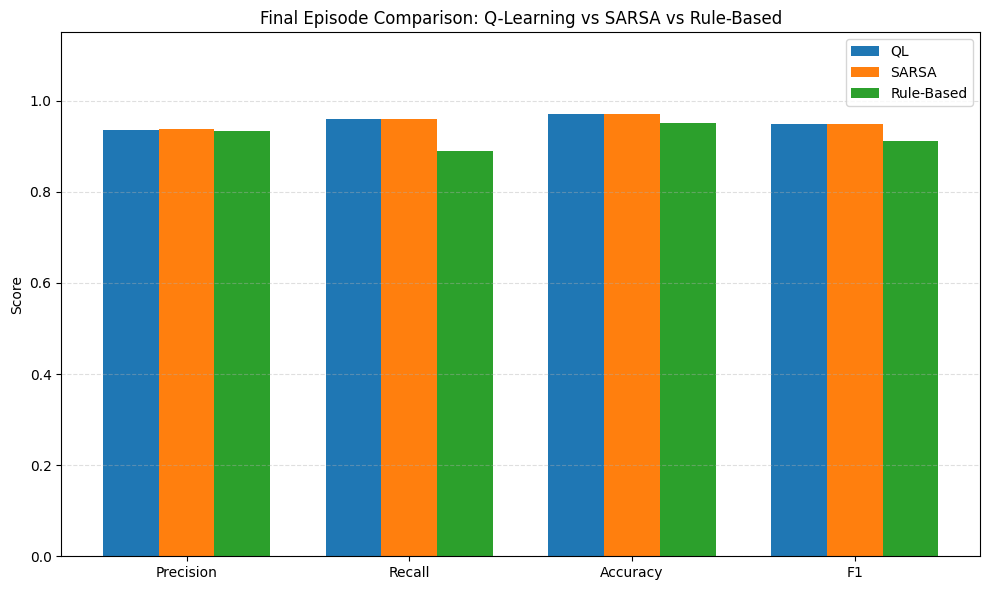

In [24]:
ql_last = results["QLearning"]["summary"]["last"]
sa_last = results["SARSA"]["summary"]["last"]
rb = results["RuleBased"]["summary"]["last"]

metrics = ["precision", "recall", "accuracy", "f1"]

ql_last_vals = [ql_last[m] for m in metrics]
sa_last_vals = [sa_last[m] for m in metrics]
rb_vals = [rb[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10, 6))

plt.bar(x - width, ql_last_vals, width, label="QL")
plt.bar(x, sa_last_vals, width, label="SARSA")
plt.bar(x + width, rb_vals, width, label="Rule-Based")

plt.xticks(x, [m.capitalize() for m in metrics])
plt.ylabel("Score")
plt.ylim(0, 1.15)
plt.title("Final Episode Comparison: Q-Learning vs SARSA vs Rule-Based")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('../results/combined/metrics_comparison_last_only.png')
plt.show()


In [25]:
print(results["QLearning"]["summary"]["last"])

{'reward': 297922.0, 'precision': 0.9366350319437498, 'recall': 0.9606666781928983, 'accuracy': 0.9709677729770255, 'f1': 0.9484986594751413, 'confusion_matrix': {'TP': 55564, 'FP': 3759, 'TN': 146240, 'FN': 2275}}


In [26]:
print(results["SARSA"]["summary"]["last"])

{'reward': 297807.0, 'precision': 0.93684973778728, 'recall': 0.9605629419595609, 'accuracy': 0.9710062644944574, 'f1': 0.9485581596817217, 'confusion_matrix': {'TP': 55558, 'FP': 3745, 'TN': 146254, 'FN': 2281}}


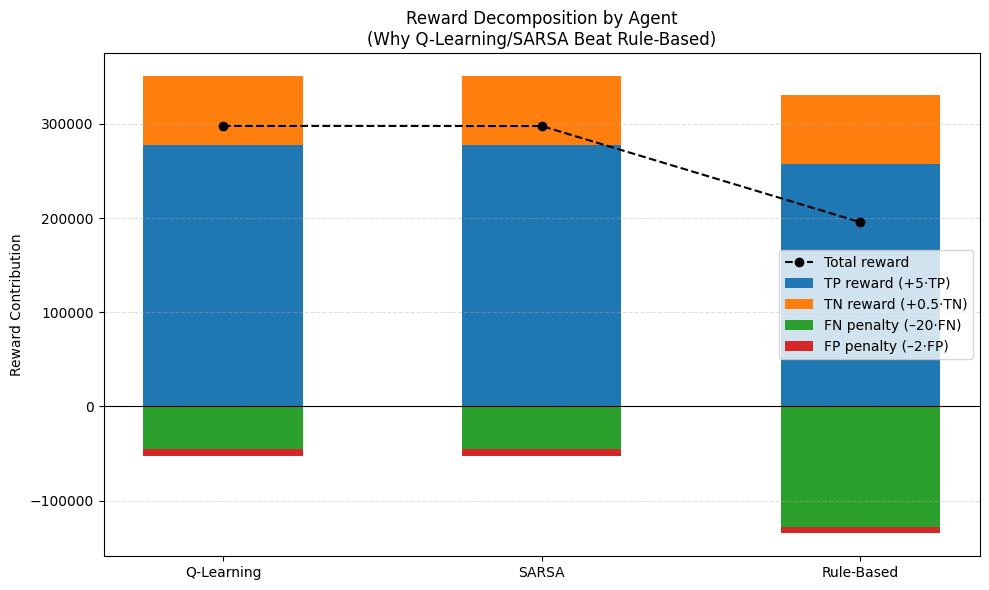

In [29]:
agents = ["QLearning", "SARSA", "RuleBased"]
agent_labels = ["Q-Learning", "SARSA", "Rule-Based"]

# Helper: adjust this to how your results.json stores confusion matrices
def get_last_cm(agent_key):
    # Example possibilities – uncomment the one that matches your file:
    # return results[agent_key]["confusion_matrices"]["last"]
    # return results[agent_key]["summary"]["last_confusion_matrix"]
    return results[agent_key]["summary"]["last"]["confusion_matrix"]  # <- adjust if needed

tp_w, fn_w, fp_w, tn_w = 5.0, -20.0, -2.0, 0.5

tp_rewards = []
tn_rewards = []
fn_penalties = []
fp_penalties = []
totals = []

for ag in agents:
    cm = get_last_cm(ag)
    TP = cm["TP"]
    FP = cm["FP"]
    TN = cm["TN"]
    FN = cm["FN"]

    tp_r = TP * tp_w
    fn_r = FN * fn_w
    fp_r = FP * fp_w
    tn_r = TN * tn_w
    total_r = tp_r + fn_r + fp_r + tn_r

    tp_rewards.append(tp_r)
    tn_rewards.append(tn_r)
    fn_penalties.append(fn_r)
    fp_penalties.append(fp_r)
    totals.append(total_r)

x = np.arange(len(agents))
width = 0.5

plt.figure(figsize=(10, 6))

# Positive components (stack upwards)
plt.bar(x, tp_rewards, width, label="TP reward (+5·TP)")
plt.bar(x, tn_rewards, width, bottom=tp_rewards, label="TN reward (+0.5·TN)")

# Negative components (stack downwards)
plt.bar(x, fn_penalties, width, label="FN penalty (–20·FN)")
plt.bar(x, fp_penalties, width, bottom=fn_penalties, label="FP penalty (–2·FP)")

# Optional: overlay total reward as markers
plt.plot(x, totals, "ko--", label="Total reward", linewidth=1.5)

plt.xticks(x, agent_labels)
plt.ylabel("Reward Contribution")
plt.title("Reward Decomposition by Agent\n(Why Q-Learning/SARSA Beat Rule-Based)")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("../results/combined/reward_decomposition.png")
plt.show()
